## Notebook03a

### Setup

Run all of the following before starting the notebook.

In [1]:
! wget -q -nc https://raw.githubusercontent.com/taylor-arnold/fds-py/refs/heads/main/funs.py

In [2]:
import numpy as np
import polars as pl

from funs import *
from plotnine import *
from polars import col as c
theme_set(theme_minimal())

ub = "https://raw.githubusercontent.com/taylor-arnold/fds-py-nb/refs/heads/main/"

In [4]:
food = pl.read_csv(ub + "data/food.csv").drop(c.description)
food

item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,color
str,str,i64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,str,str
"""Apple""","""fruit""",52,0.1,0.028,0,1,13.81,2.4,10.39,0.26,1,1,8,"""apple""","""red"""
"""Asparagus""","""vegetable""",20,0.1,0.046,0,2,3.88,2.1,1.88,2.2,12,15,9,"""asparagus""","""green"""
"""Avocado""","""fruit""",160,14.6,2.126,0,7,8.53,6.7,0.66,2.0,3,3,17,"""avocado""","""green"""
"""Banana""","""fruit""",89,0.3,0.112,0,1,22.84,2.6,12.23,1.09,1,1,15,"""banana""","""yellow"""
"""Chickpea""","""grains""",180,2.9,0.309,0,243,29.98,8.6,5.29,9.54,17,0,3,"""chickpea""","""brown"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Tomato""","""vegetable""",18,0.0,0.046,0,5,3.92,1.2,2.63,0.88,2,17,21,"""tomato""","""red"""
"""Tuna""","""fish""",153,3.9,0.811,53,366,0.41,0.0,0.09,27.3,5,3,4,"""tuna""","""red"""
"""Turkey""","""meat""",187,7.0,1.999,77,69,0.0,0.0,0.0,28.9,8,0,0,"""turkey_(bird)""","""white"""


### Questions

We will continue working with the `food` dataset, this time focusing on visualizations using `plotnine`. Remember to look at your output after each question to understand what each piece of code does.

Create a scatter plot with vitamin A on the x-axis and iron on the y-axis.

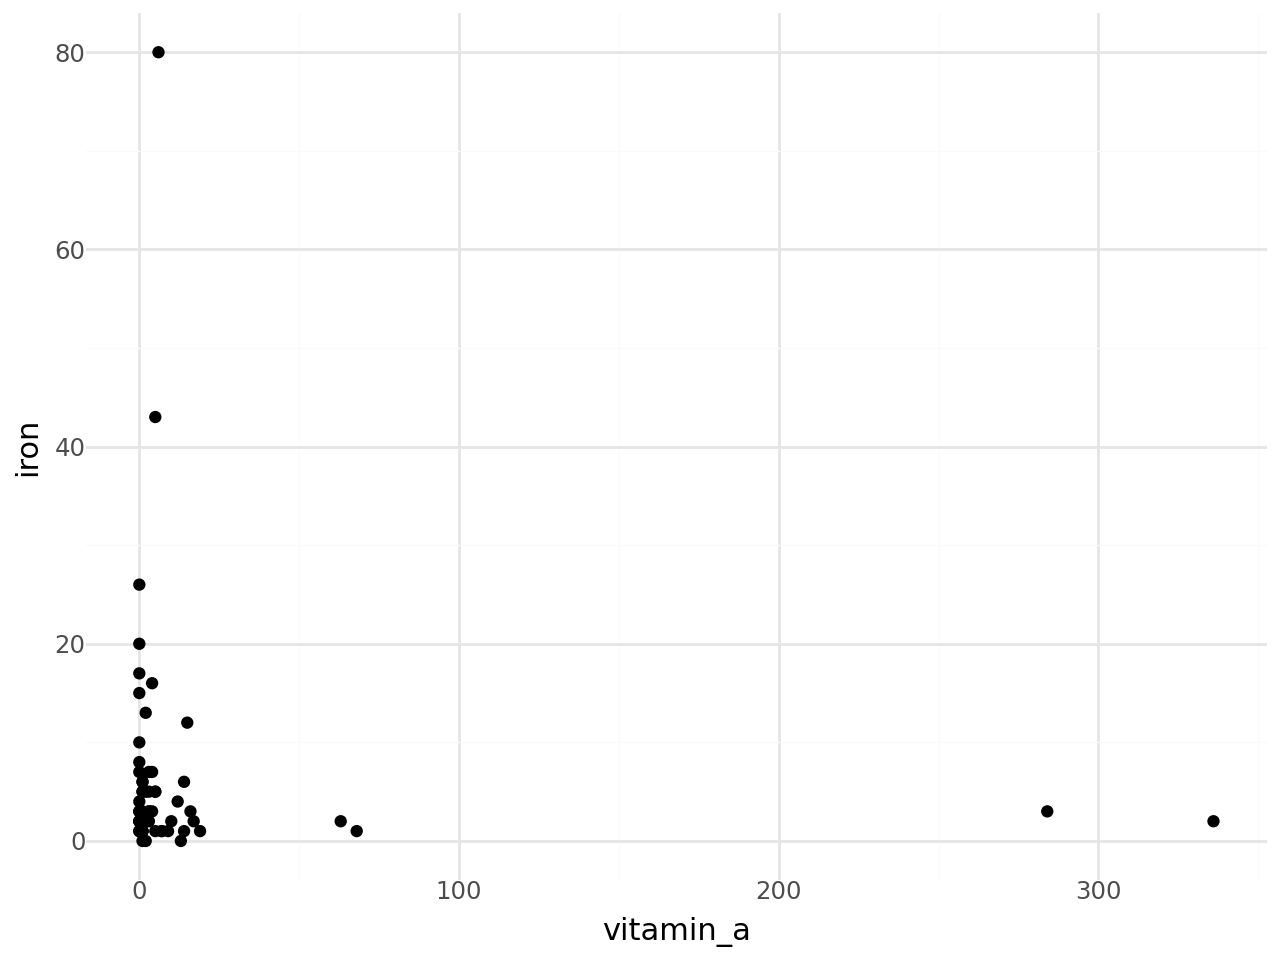

In [6]:
(
    ggplot(food, aes("vitamin_a", "iron"))
    + geom_point()
)

Now create a scatter plot with protein on the x-axis and fiber on the y-axis.

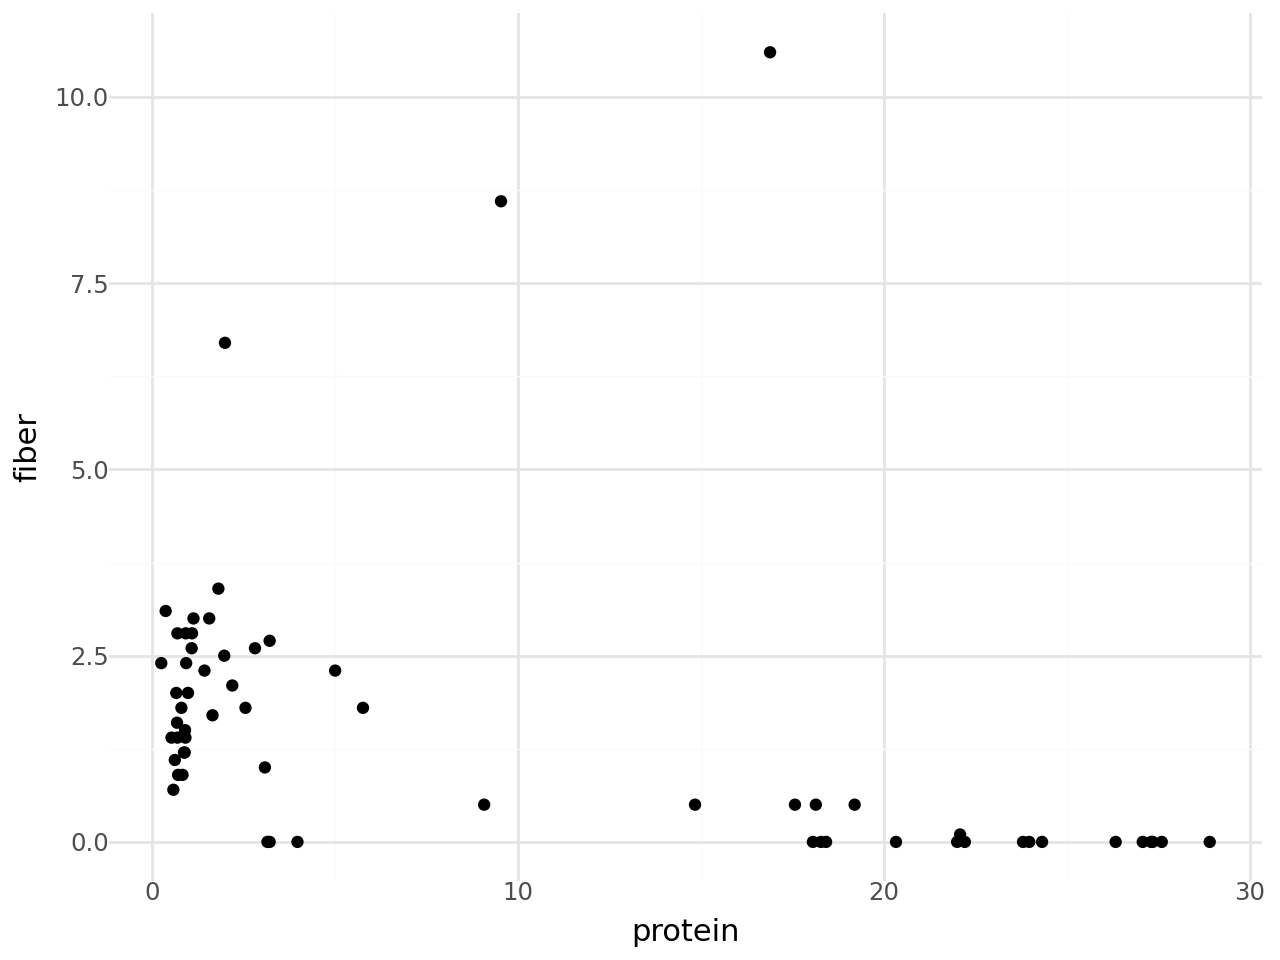

In [7]:
(
    ggplot(food, aes("protein", "fiber"))
    + geom_point()
)

Recreate the previous plot, but this time color the points by food group. Notice that `color` goes inside `aes()` when mapping to a variable.

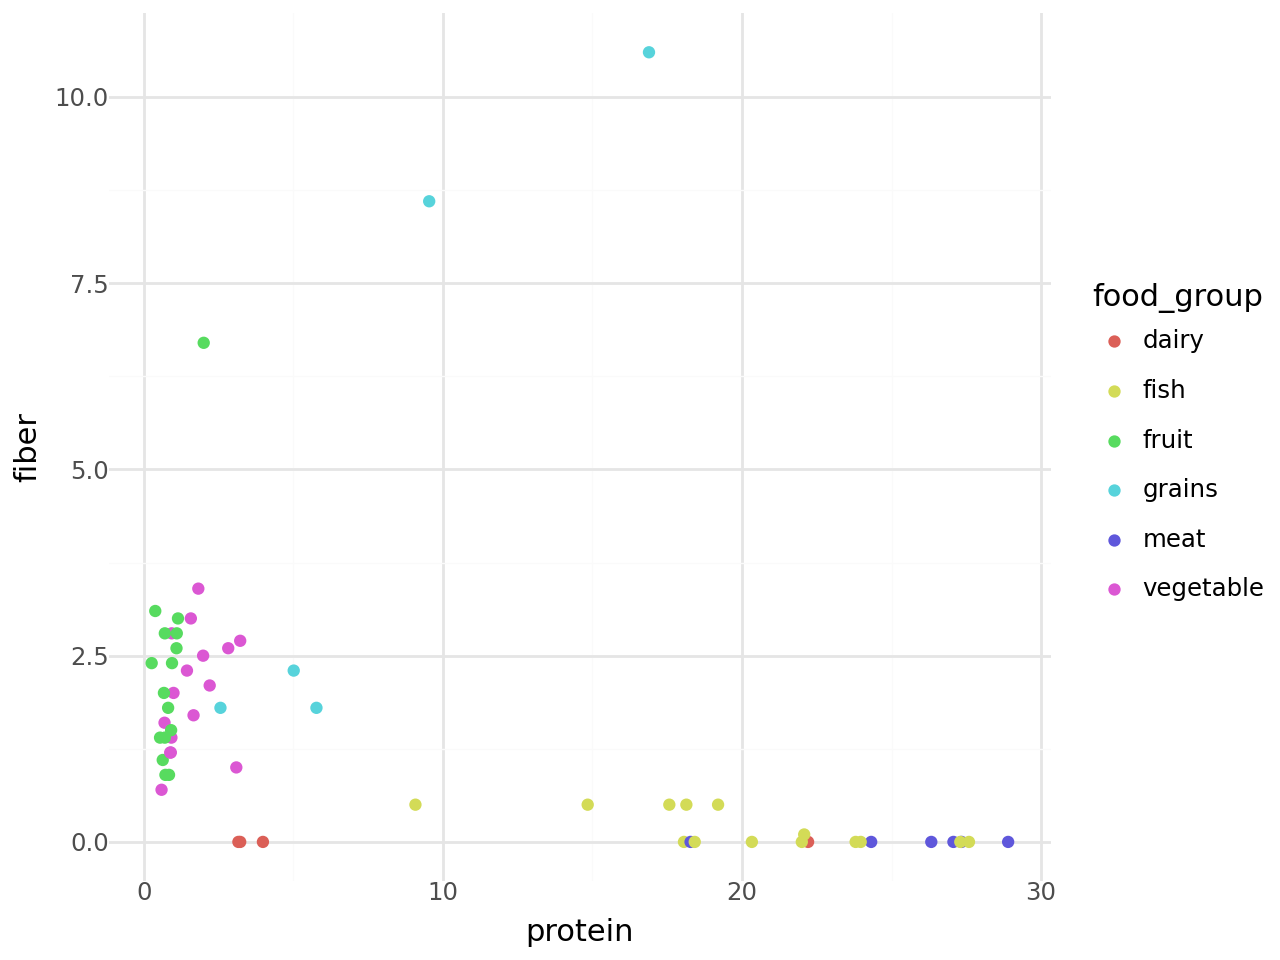

In [8]:
(
    ggplot(food, aes("protein", "fiber"))
    + geom_point(aes(color = "food_group"))
)

Use a [Color Wheel](https://htmlcolorcodes.com/color-wheel/) to select a fun color. In the code below, update the previous plot to use this fixed color in place of the food group-based colors. Notice that when using a fixed color (not mapped to data), `color` goes outside of `aes()`.

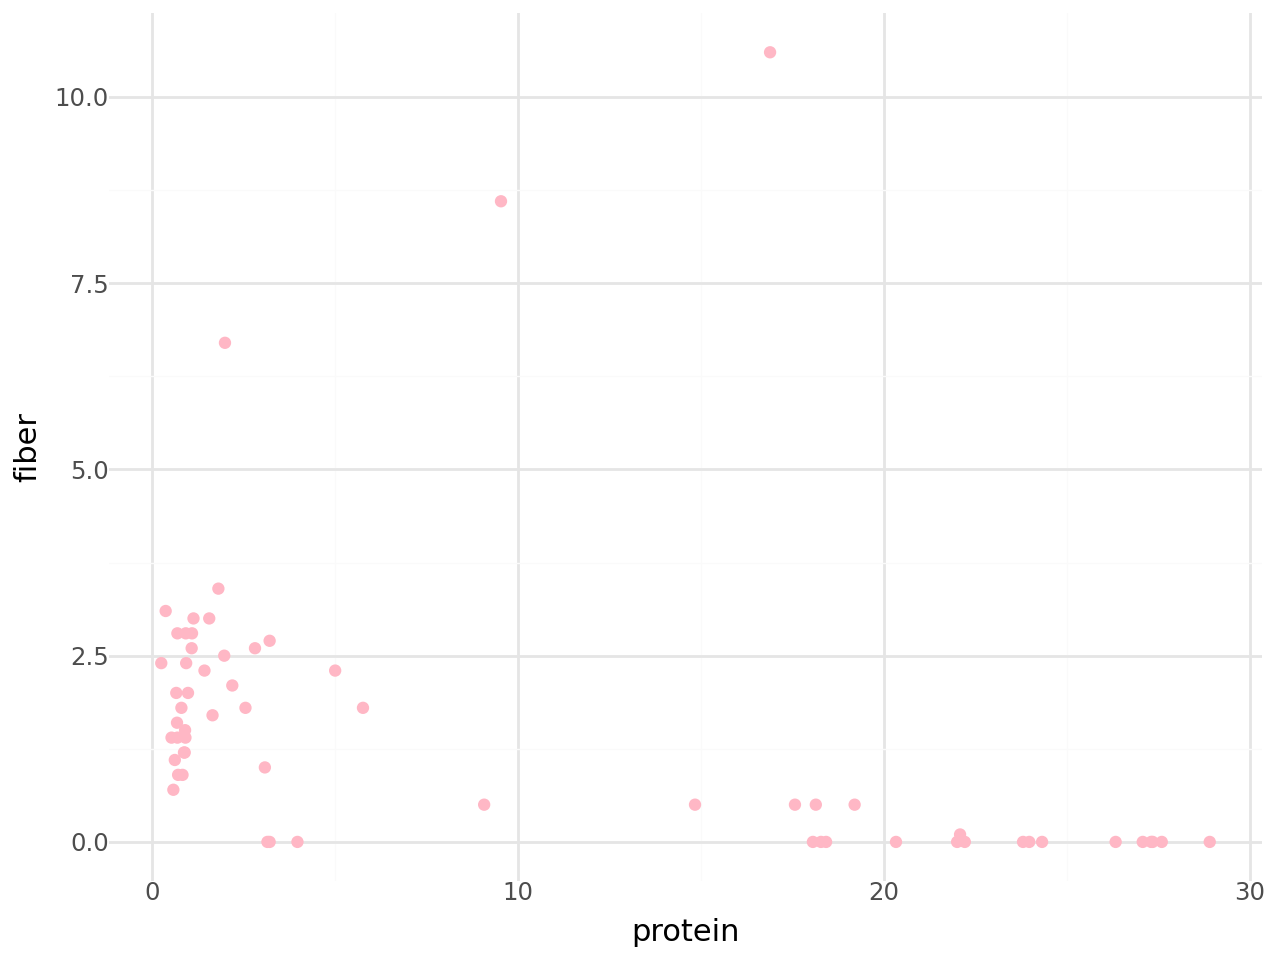

In [13]:
(
    ggplot(food, aes("protein", "fiber"))
    + geom_point(color = "#FFB7C5")
)

Instead of points, use text labels to display the item names. Replace `geom_point()` with `geom_text()` and map the `label` aesthetic to the `item` column.

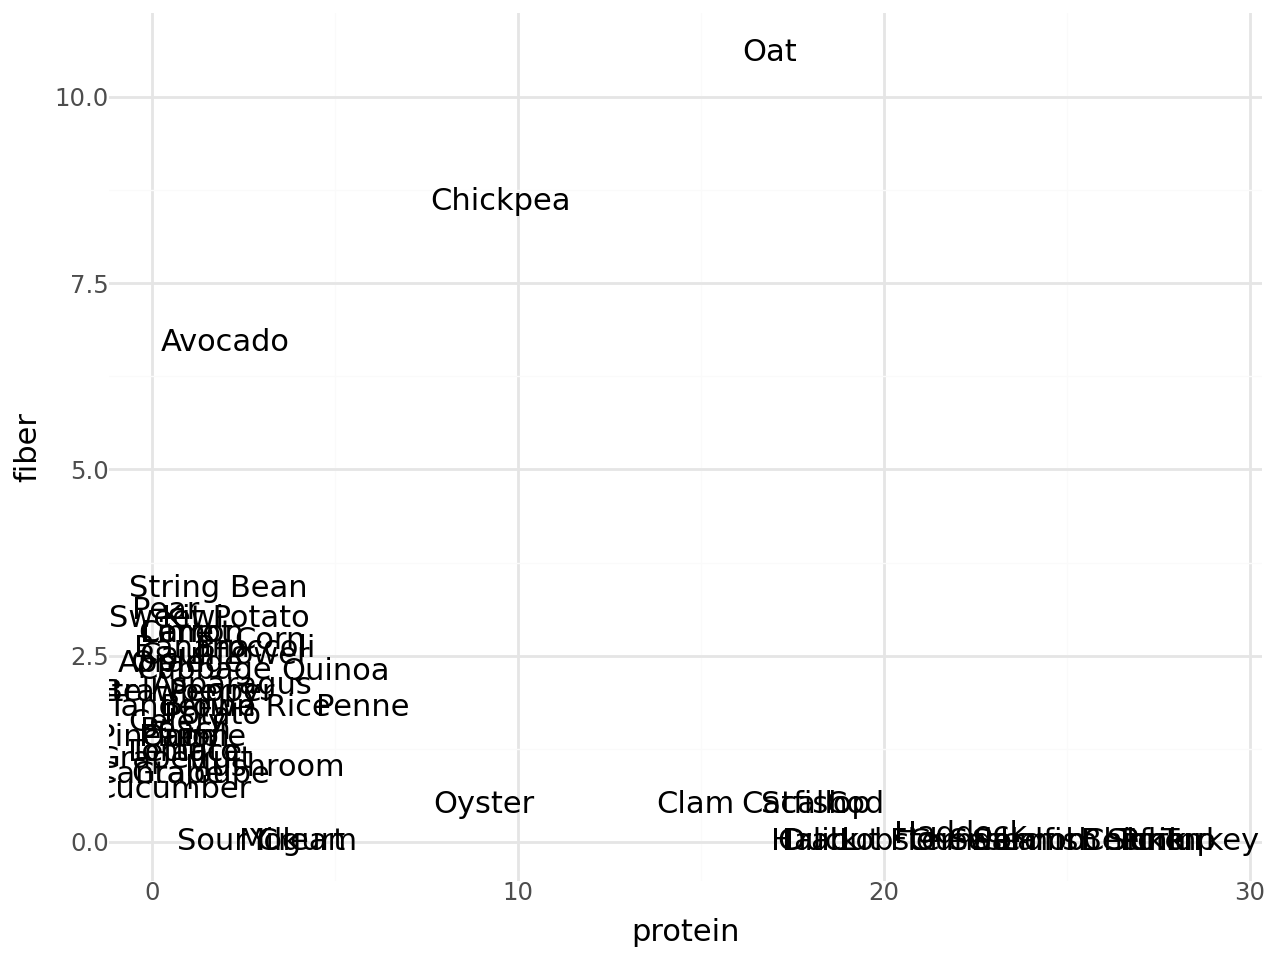

In [14]:
(
    ggplot(food, aes("protein", "fiber"))
    + geom_text(aes(label = "item"))
)

That's hard to read with so many items! We should filter the data to only include fruits, then create the same text plot. To do this, add `.filter(c.food_group == "fruit")` as the first line of the chain before calling `.pipe`.

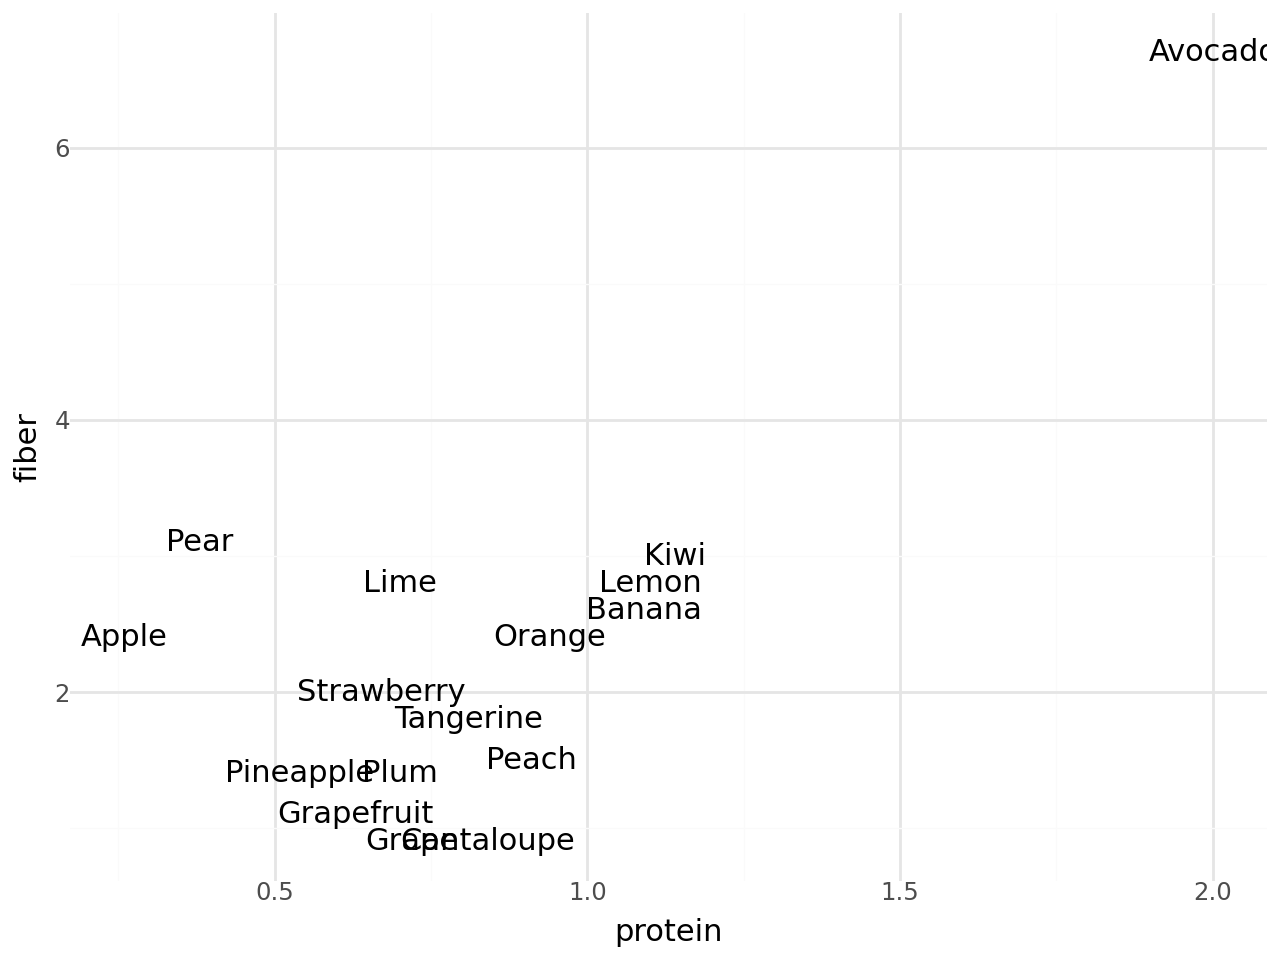

In [18]:
(
    food
    .filter(c.food_group == "fruit")
    .pipe(ggplot, aes("protein", "fiber"))
    + geom_text(aes(label="item"))
)

Finally, add both points and text labels to the plot. Use `nudge_y` to shift the text up slightly so it doesn't overlap with the points.

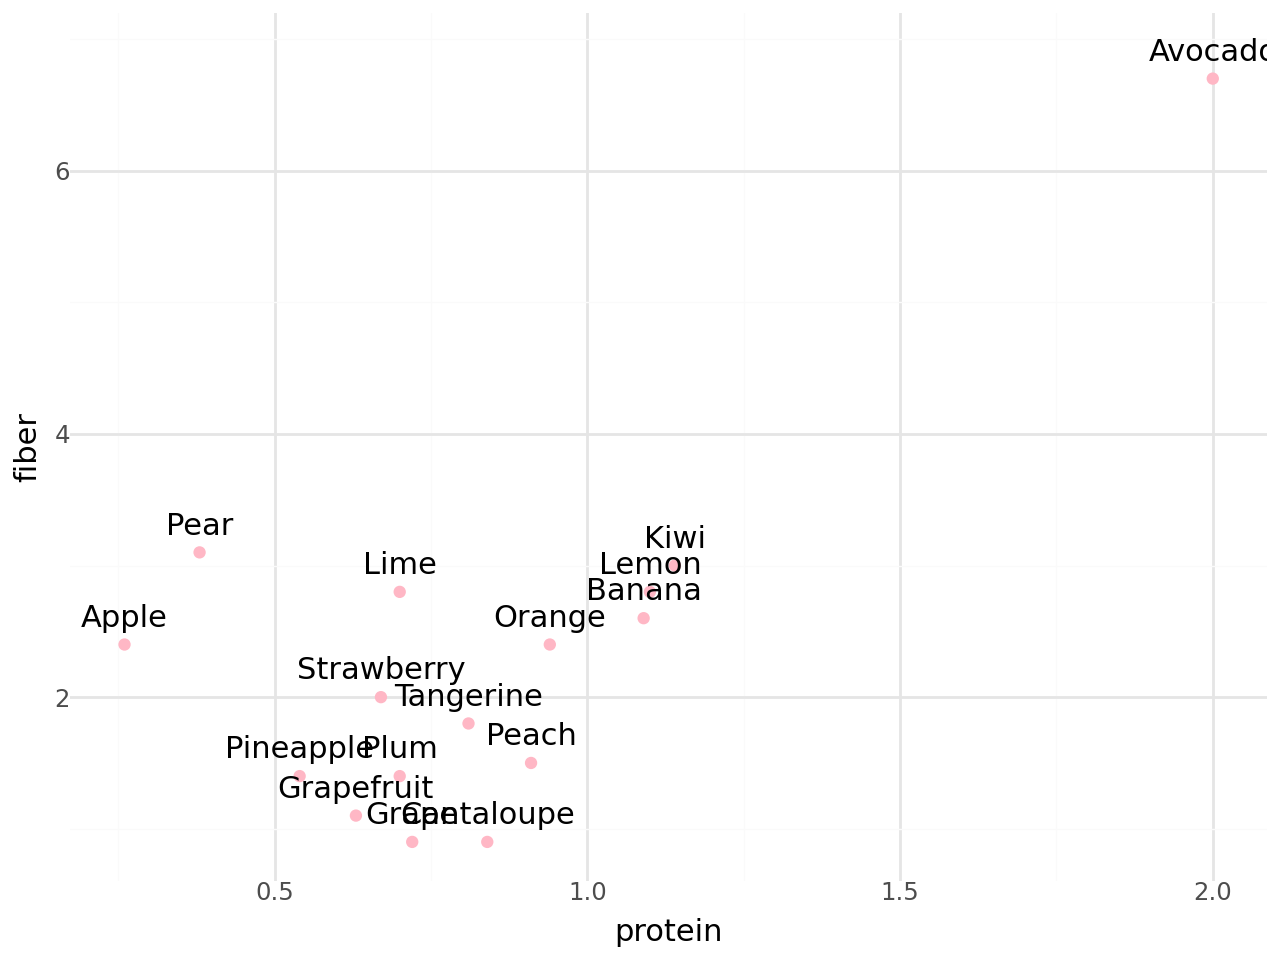

In [20]:
(
    food
    .filter(c.food_group == "fruit")
    .pipe(ggplot, aes("protein", "fiber"))
    + geom_point(color = "#FFB7C5")
    + geom_text(aes(label="item"), nudge_y = 0.2)
)